### Multivariate Time Series

**Multivariate Time Series(다변량 시계열)** 은 각 시간 단위마다 여러개의 값을 가지는 시계열을 의미한다. 거시경제분석 등의 분야에서 많이 사용된다

#### 1. Vector Process

**1.1 Weak Stationarity and Cross-Correlation Matrices**

k-dimensional time series $\mathbf{r} _t = [r_{1t}, \cdots, r_{kt}]^{'}$를 고려하자. 이들의 first, second moment가 시간에 영향을 받지 않는 시계열이면 weakly stationary하다고 한다. 특히, weakly stationary한 시계열의 Covariance matrix와 mean vector는 Constant 하다.
Weakly stationary time series $\mathbf{r} _t$가 있을 때, mean vector는
$$\mathbf{μ} = E(\mathbf{r} _t)$$
이고, Covariance matrix는
$$\mathbf{Γ} _0 = E[(\mathbf{r} _t - \mathbf{μ})(\mathbf{r} _t - \mathbf{μ})^{'}]$$
이다. 여기서 기대값은 $\mathbf{r} _t$의 joint distribution에서 추정된 것이다

#### example 1

pandas datareader로부터 데이터를 가져와 mean vector와 covariance matrix를 생성해 보자

In [1]:
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd

start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

samsung = pdr.DataReader("005930", "naver", start_date, end_date).astype(int)
kakao = pdr.DataReader("035720", "naver", start_date, end_date).astype(int)
hynics = pdr.DataReader("000660", "naver", start_date, end_date).astype(int)
LG = pdr.DataReader("003550", "naver", start_date, end_date).astype(int)

각 종목별 수익률을 계산해 줘야 한다

In [2]:
ret_samsung = (np.log(samsung.Close) - np.log(samsung.Close.shift())).dropna()
ret_kakao = (np.log(kakao.Close) - np.log(kakao.Close.shift())).dropna()
ret_hynics = (np.log(hynics.Close) - np.log(hynics.Close.shift())).dropna()
ret_LG = (np.log(LG.Close) - np.log(LG.Close.shift())).dropna()

수익률이 계산되었으면, 하나의 Data Frame으로 결합해야 한다

In [3]:
matrix = pd.concat([ret_samsung, ret_kakao, ret_hynics, ret_LG], axis = 1)
matrix.columns = ['Samsung','Kakao','Hynics','LG']
matrix

,Samsung,Kakao,Hynics,LG
Date,,,,
2022-01-04,0.001271,-0.026550,0.000000,0.017136
2022-01-05,-0.016656,-0.055314,-0.023623,-0.012210
2022-01-06,-0.006481,-0.053541,-0.003992,-0.007398
2022-01-07,0.018042,0.000000,0.015873,0.009852
2022-01-10,-0.003839,-0.034591,-0.019881,-0.009852
...,...,...,...,...
2022-12-23,-0.017065,-0.031339,-0.017835,0.019681
2022-12-26,-0.003448,0.003738,-0.010336,-0.008563
2022-12-27,0.003448,0.014815,0.000000,0.006124


`mean()` method에서 axis를 0으로 지정하여 계산하면 각 종목별 평균 수익률을 계산할 수 있다

In [4]:
matrix.mean(axis = 0)

Samsung   -0.001435
Kakao     -0.003136
Hynics    -0.002198
LG        -0.000149
dtype: float64

`cov()` method를 사용하면 DataFrame의 Covariance를 계산할 수 있다

In [5]:
matrix.cov()

,Samsung,Kakao,Hynics,LG
Samsung,0.000205,0.000189,0.000212,0.000126
Kakao,0.000189,0.000723,0.000236,0.000162
Hynics,0.000212,0.000236,0.000439,0.000149
LG,0.000126,0.000162,0.000149,0.000287


seaborn library에서 `heatmap()` 함수를 이용하면 시각화를 할 수 있다

<Axes: >

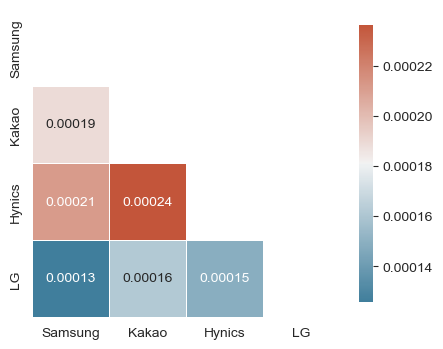

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(matrix.cov(), dtype = bool))
f, ax = plt.subplots(figsize = (5, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.grid(False)
sns.heatmap(matrix.cov(), mask = mask, cmap = cmap,
            square = True, linewidths = .5, cbar_kws = {"shrink": .9}, annot = True)

#### Exercise 1

종목을 직접 선정하여 pandas datareader로부터 데이터를 가져와 mean vector와 covariance matrix를 생성하라. 그리고 seaborn 라이브러리를 이용해 시각화하라. 무엇을 알 수 있는가?

**1.2 Cross-Correlation**

행렬 $\mathbf{D}$를 $k \times k$ 크기의 대각행렬이라 가정하자. 즉, $\mathbf{D} = \mbox{diag}\{\sqrt{\Gamma_{11}(0)},\cdots,\sqrt{\Gamma_{kk}(0)}\}$이다. 다변량 수익률 행렬$\mathbf{r} _t$의 concurrent하고, lag가 0인 cross correlation matrix는 다음과 같이 정의된다

$$\mathbf{ρ}_0 = [\rho_{ij}(0)] = \mathbf{D^{-1}\Gamma_0D^{-1}}$$

여기서 행렬 $\mathbf{\rho}_0$의 $(i,j)$번째 원소는 다음과 같이 정의된다

$$\rho_{ij}(0) = \frac{ Γ_{ij}(0) }{\sqrt{Γ_{ii}(0) Γ_{jj}(0)}} = \frac{\mathrm{Cov(r_{it}, r_{jt})}}{\mathrm{std}(r_{it}) \mathrm{std}(r_{jt})}$$

이는 $r_{it}$와 $r_{jt}$ 사이의 correlation coefficient이기도 하다. 한편, multivariate time seires 분석에서 가장 중요한 주제는 바로 시계열간의 lead-lag relationship이다. cross-correlation matrices는 각 시계열들이 얼마나 선형 의존적(linear dependence)인지 측정하는 지표로 사용된다. 시차가 $l$인 cross covariance matrix는

$$\mathbf{Γ}_l = [Γ_{ij}(l)] = E[(\mathbf{r} _t - \mathbf{μ})(\mathbf{r} _{t-l} - \mathbf{μ})^{'}]$$
인데, cross-correlation matrix와는 다음과 같은 관계가 성립한다

$$\mathbf{ρ}_l = [\rho_{ij}(l)] = \mathbf{D^{-1}Γ_lD^{-1}}$$

정의에 의해,

$$\rho_{ij}(l) = \frac{Γ_{ij}(l)}{\sqrt{ Γ_{ii}(0)Γ_{jj}(0) }} = \frac{\mathrm{Cov}(r_{it}, r_{j,t-l})}{\mathrm{std}(r_{it})\mathrm{std}(r_{jt})}$$

한편, 조건부 수익률 $\{\mathbf{r}_t|t=1,\cdots,T\}$에서의 Sample Cross-Correlation Matrix는 다음과 같이 추정된다

$$\mathbf{\hat\Gamma}_l = \frac{1}{T}\sum_{t=l+1}^T (\mathbf{r} _t - \mathbf{\bar r})(\mathbf{r} _{t-l} - \mathbf{\bar r})^{'}, ~~~~~ l \geq 0$$

여기서 $\mathbf{\bar r} = \frac{\sum_{t=1}^T \mathbf{r}_t}{T}$ 은 vector of sample mean이다. sample cross-correlation matrix는 동일한 논리로 다음과 같이 추정된다

$$\mathbf{\hat \rho}_l = \mathbf{\hat D^{-1} \hat Γ_l \hat D^{-1}}, ~~~~~ l \geq 0$$

#### example 2

example 1에서 구한 종목 수익률 행렬에서 correlation matrix를 구해 보자

pandas DataFrame에서 `corr()` method를 사용하면 correlation matrix를 구할 수 있다

In [7]:
matrix.corr()

,Samsung,Kakao,Hynics,LG
Samsung,1.000000,0.491056,0.705545,0.518667
Kakao,0.491056,1.000000,0.419612,0.354378
Hynics,0.705545,0.419612,1.000000,0.419940
LG,0.518667,0.354378,0.419940,1.000000


마찬가지로 seaborn의 `heatmap()` 함수를 사용하여 시각화를 할 수 있다

<Axes: >

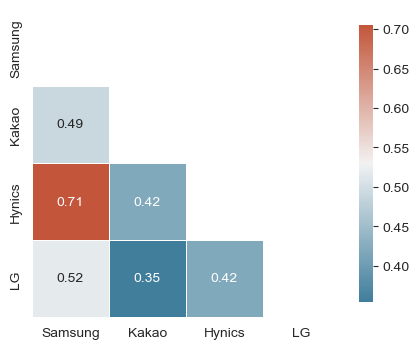

In [8]:
mask = np.triu(np.ones_like(matrix.cov(), dtype = bool))
f, ax = plt.subplots(figsize = (5, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
plt.grid(False)
sns.heatmap(matrix.corr(), mask = mask, cmap = cmap,
            square = True, linewidths = .5, cbar_kws = {"shrink": .9}, annot = True)

seaborn 라이브러리의 `pairplot()` 함수를 사용하면 다음과 같이 cross-correlation plot을 그릴 수 있다

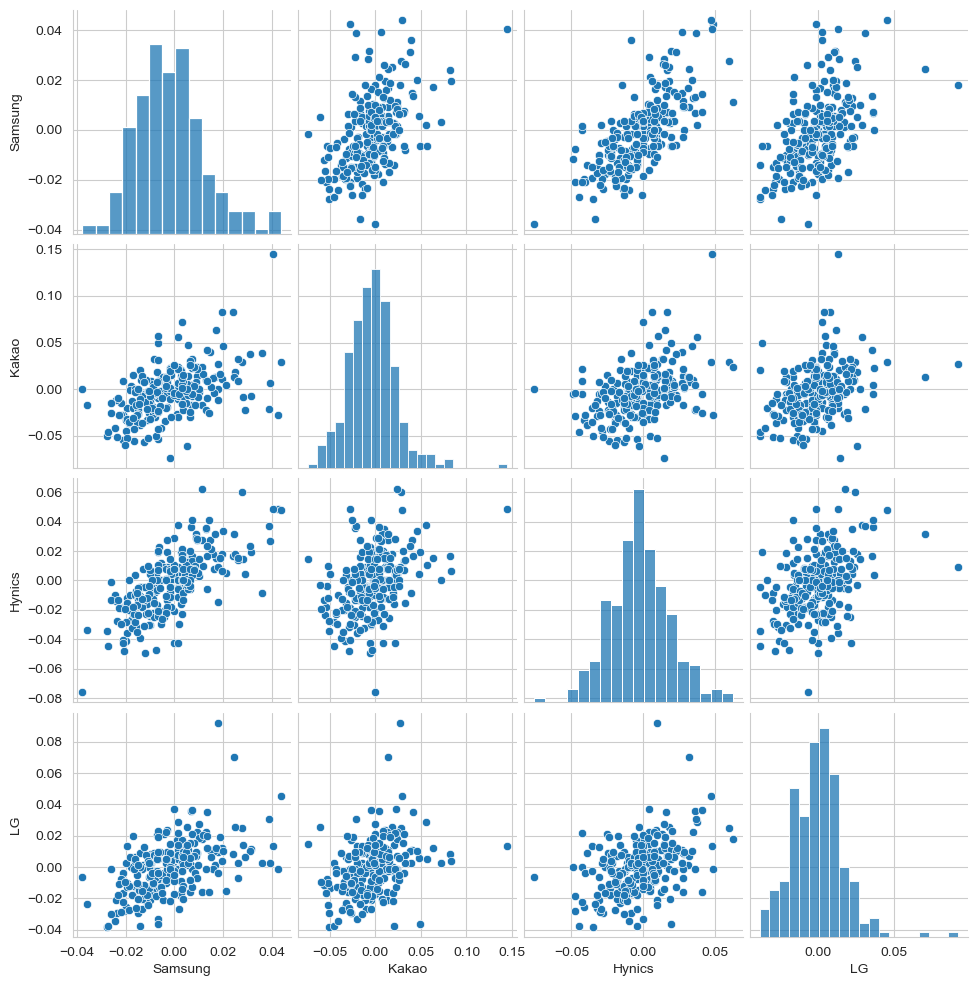

In [9]:
sns.pairplot(matrix)
plt.show()

#### Exercise 2

Exercise 1에서 구한 종목 수익률 행렬에서 correlation matrix를 구하라. 그리고 시각화하라. 무엇을 알 수 있는가?

**1.3 Vector Autoregressive models**

multivairate time seires가 $\mathrm{VAR(1)}$ 모형을 따른다고 하자

$$\mathbf{r}_t = \mathbf{ϕ}_0 + \mathbf{Φr}_{t-1} + \mathbf{a}_t$$

$k=2$일 때 $\mathrm{VAR(1)}$ 모형은 다음 식을 따른다

$$r_{1t} = ϕ_{10} + ϕ_{11}r_{1,t-1} + ϕ_{12}r_{2,t-1} + a_{1t}$$
$$r_{2t} = ϕ_{20} + ϕ_{21}r_{1,t-1} + ϕ_{22}r_{2,t-1} + a_{2t}$$

**1.4 Stationarity Condition and Moments of a VAR(1) Model**

약정상성을 띄는 $\mathrm{VAR(1)}$을 고려하자. 여기서 오차항의 평균은 $E(\mathbf{a}_t) = \mathbf{0}$이다. 여기서 다음 식을 얻을 수 있다

$$E(\mathbf{r}_t) = \mathbf{\phi}_0 + \mathbf{\Phi}E(\mathbf{r}_{t-1})$$

$E(\mathbf{r}_t)$는 시간에 영향을 받지 않기 때문에, 다음과 같은 식을 알 수 있다

$$\mathbf{\mu} = E(\mathbf{r}_t) = (\mathbf{I} - \mathbf{\Phi})^{-1}\mathbf{\Phi}_0$$

$\mathbf{I-\Phi}$은 가역적이고, 여기서 $\mathbf{I}$는 $k \times k$의 항등행렬이다. $\mathbf{\phi}_0 = (\mathbf{I} - \mathbf{\Phi})\mathbf{\mu}$를 이용해, $\mathrm{VAR(1)}$모형은 다음과 같이 쓸 수 있다

$$(\mathbf{r_t} - \mathbf{\mu}) = \mathbf{\Phi}(\mathbf{r_{t-1}} - \mathbf{\mu})+\mathbf{a}_t$$

$\mathbf{\tilde r_t}(\mathbf{r_t} - \mathbf{\mu})$는 mean corrected time series이다. 이를 이용해 $\mathrm{VAR(1)}$ 모형을 다시 쓰면

$$\mathbf{\tilde r}_t = \mathbf{\Phi}\mathbf{ \tilde r}_{t-1} -\mathbf{a}_t$$

이다. 한편, 이 모형을 오차항에 대해서 다시 쓸 수 있는데, VAR(1) 모형은 VMA(q) 모형으로 바꿀 수 있다

$$\mathbf{\tilde r}_t = \mathbf{a}_t + \mathbf{\Phi}\mathbf{a}_{t-1} + \mathbf{\Phi}^2 \mathbf{a}_{t-2} + \mathbf{\Phi}^3 \mathbf{a}_{t-3} + \cdots$$

이는 VAR(1) process의 몇가지 특성을 보여주고 있다
1. $\mathbf{a}_t$는 시계열적으로 uncorrelate하기 때문에, $\mathrm{Cov}(\mathbf{a}_t, \mathbf{r}_{t-1}) = \mathbf{0}$이다
2. 적절한 변환을 취하여 생성한 공분산 $\mathrm{Cov}(\mathbf{r}_t, \mathbf{a}_t) = \mathbf{\Sigma}$이 존재한다
3. $\mathbf{r}_t$는 codfficient matrix $\mathbf{\Phi}^j$의 과거 오차 $\mathbf{a}_{t-j}$에 의존한다
4. Covariance matirx는 다음과 같다
$$\mathrm{Cov}(\mathbf{r}_t) = \mathbf{\Gamma}_0 = \mathbf{\Sigma} + \mathbf{\Phi}\mathbf{\Sigma}\mathbf{\Phi}^{'} + \mathbf{\Phi}^2\mathbf{\Sigma}(\mathbf{\Phi}^2)^{'} + \cdots = \sum_{i=0}^{\infty} \mathbf{\Phi}^i \mathbf{\Sigma}(\mathbf{\Phi}^i)^{'}$$

위 식에 $\mathbf{\tilde r^{'}_{t-l}}$을 곱한 뒤 평균을 구하고, 공분산을 계산하면 $\mathrm{Cov}(\mathbf{a}_t, \mathbf{r}_{t-j}) = E(\mathbf{a}_t \mathbf{\tilde r}^{'}_{t-j}) = \mathbf{0} ~~ \mbox{for} ~~ j>0$이다. 이를 통해 우리는 아래 식을 구할 수 있다

$$E(\mathbf{\tilde r_t \tilde r_{t-l}^{'}}) = \mathbf{\Phi} E(\mathbf{\tilde r_{t-1} \tilde r_{t-l}})^{'}, ~~~~~ l > 0$$

그러므로

$$\mathbf{\Gamma}_l = \mathbf{\Phi\Gamma}_{l-1}, ~~~~~ l>0$$

이다. 오른쪽 식의 행렬 앞 뒤로 $\mathbf{D}^{-1/2}$를 곱하면, 다음과 같이 Cross Correlation Matrix를 구할 수 있다

$$\mathbf{\rho}_l = \mathbf{\Upsilon}^l\mathbf{\rho}_{l-1}$$

**1.5 Vector AR(p) Models**

$\mathrm{VAR(1)}$ 모형을 일반화하면 다음과 같이 $\mathrm{VAR}(p)$ 모형으로 표현 가능하다

$$\mathbf{r}_t = \mathbf{\phi}_0 + \mathbf{\Phi}_1\mathbf{r}_{t-1} + ⋯ + \mathbf{Φ}_p \mathbf{r}_{t-p} + \mathbf{a}_t, ~~~~~ p>0$$

만약 시계열 $\mathbf{r}_t$가 weakly stationary 하다면,
$$\mathbf{μ} = E(\mathbf{r}_t) = (\mathbf{I} - \mathbf{\Phi}_1 - ⋯ - \mathbf{Φ}_p)^{-1}\mathbf{\phi}_0 = [\mathbf{Φ}(1)]^{-1}\mathbf{\phi}_0$$
이다. $\mathbf{\tilde r}_t = \mathbf{r}_t - \mathbf{μ}$이라고 하자. 그러면 $\mathrm{VAR}(p)$모형은 다음과 같이 표현할 수 있다

$$\mathbf{\tilde r}_t = \mathbf{Φ}_1 \mathbf{\tilde r}_{t-1} + ⋯ + \mathbf{Φ}_p \mathbf{\tilde r}_{t-p} + \mathbf{a}_t$$

CCM의 정의에 따라, moment equation은
$$\mathbf{ρ}_l = \mathbf{Υ}_1 \mathbf{ρ}_{l-1} + ⋯ + \mathbf{Υ}_p \mathbf{ρ}_{l-p}, ~~~~ \mbox{for  } l>0$$

#### example 3

2013년 1월부터 2023년 6월까지의 KOSPI Index와 Samsung electronics의 월별 수익률을 이용하여 $\mathrm{VAR}(1)$ 모형을 추정하라

Pandas DataReader 라이브러리를 활용하여 삼성전자 주식 종가와 KOSPI 인덱스를 가져온다

In [10]:
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2023, 7, 1)

samsung = pdr.DataReader("005930", "naver", start_date, end_date).astype(int)
kospi = pdr.DataReader("KOSPI", "naver", start_date, end_date).astype(float)

월별 종가로 수정해 준다

In [11]:
samsung_mon = samsung.resample('M').last()
kospi_mon = kospi.resample('M').last()

월별 수익률을 계산해 준다

In [12]:
kospi_mon_ret = (np.log(kospi_mon.Close) - np.log(kospi_mon.Close.shift(1))).dropna()
samsung_mon_ret = (np.log(samsung_mon.Close) - np.log(samsung_mon.Close.shift(1))).dropna()

VAR(1) 모형을 추정하기 위해, 하나의 DataFrame으로 만들어 주는 것이 필요하다

In [13]:
matrix_mon = pd.concat([kospi_mon_ret,samsung_mon_ret], axis = 1)
matrix_mon.columns = ['KOSPI','Samsung']
matrix_mon

,KOSPI,Samsung
Date,,
2013-02-28,0.032371,0.064193
2013-03-31,-0.010716,-0.011071
2013-04-30,-0.020631,-0.004595
2013-05-31,0.018714,0.011773
2013-06-30,-0.071312,-0.136322
...,...,...
2023-02-28,-0.005056,-0.006579
2023-03-31,0.026183,0.054588
2023-04-30,0.009911,0.023167


statsmodel의 `VAR()`함수를 사용하면 VAR 모형을 추정할 수 있다

In [14]:
from statsmodels.tsa.api import VAR

model = VAR(matrix_mon)
results = model.fit(1, trend = 'c')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, Sep, 2023
Time:                     00:29:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.1487
Nobs:                     124.000    HQIC:                  -12.2298
Log likelihood:           415.786    FPE:                4.61968e-06
AIC:                     -12.2852    Det(Omega_mle):     4.40401e-06
--------------------------------------------------------------------
Results for equation KOSPI
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.001558         0.004090            0.381           0.703
L1.KOSPI          -0.237122         0.132154           -1.794           0.073
L1.Samsung         0.118463         0.088361            1.341           

attribute중 fittedvalues를 사용하면 적합화된 결과를 확인할 수 있다

In [15]:
results.fittedvalues

,KOSPI,Samsung
Date,,
2013-03-31,0.001486,0.003653
2013-04-30,0.002787,0.008761
2013-05-31,0.005905,0.012083
2013-06-30,-0.001485,0.002694
2013-07-31,0.002318,0.014193
...,...,...
2023-02-28,-0.006027,-0.006716
2023-03-31,0.001977,0.007603
2023-04-30,0.001816,0.004495


<Axes: xlabel='Date'>

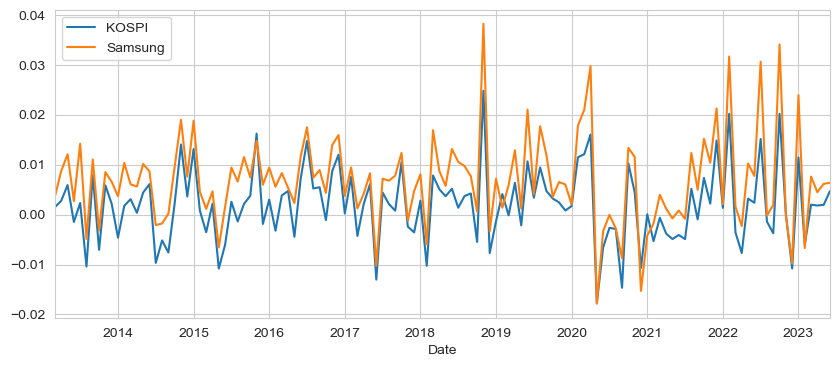

In [16]:
results.fittedvalues.plot(figsize = (10,4))

`plot_forecast()` method를 사용하면, 예측값을 확인할 수 있다

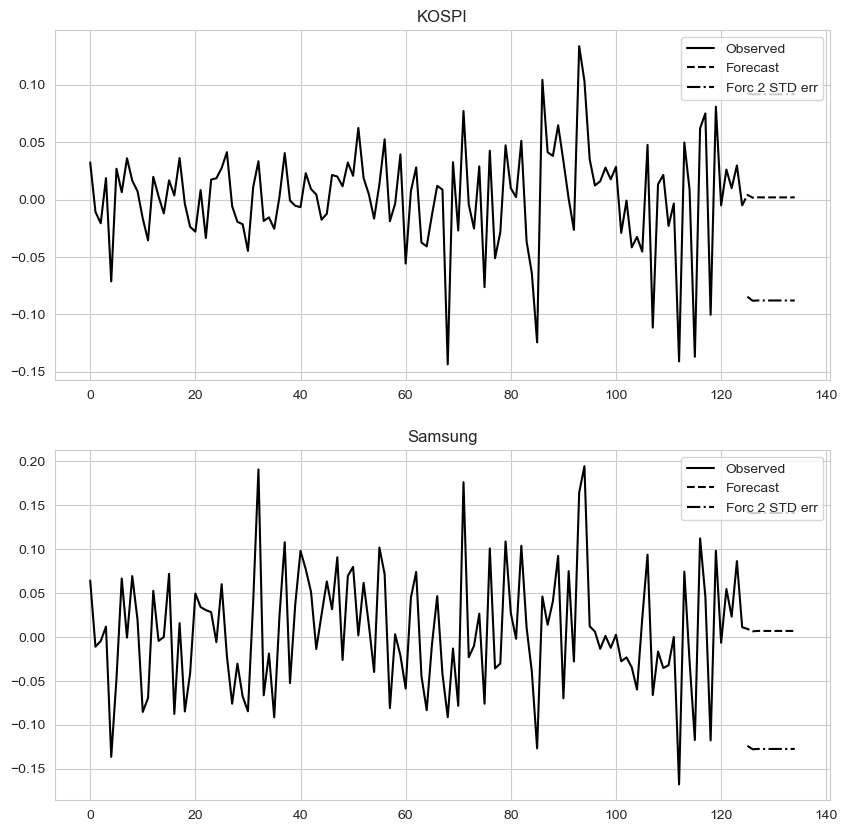

In [17]:
results.plot_forecast(steps = 10)
plt.show()

`smvar()` 함수를 사용하면, information criterion을 기준으로 가장 적합한 모형을 자동으로 설계해 준다

In [18]:
import statsmodels.tsa.vector_ar.var_model as smvar
# Automatic VAR estimation
model_sm = smvar.VAR(matrix_mon)
results_smvar = model.fit(maxlags = 4, method = 'ols', ic = 'bic', trend = 'c', verbose = False)

In [19]:
results_smvar.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, Sep, 2023
Time:                     00:29:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2837
Nobs:                     125.000    HQIC:                  -12.3105
Log likelihood:           417.823    FPE:                4.42198e-06
AIC:                     -12.3289    Det(Omega_mle):     4.35207e-06
--------------------------------------------------------------------
Results for equation KOSPI
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.002142         0.004057            0.528           0.598

Results for equation Samsung
           coefficient       std. error           t-stat            prob
--------------------------------------------------------------

#### Exercise 3

2013년 1월부터 2023년 6월까지의 KOSPI와 KOSDAQ의 index를 불러오라. 그리고 월별 수익률로 환산하라. $\mathrm{VAR}(2)$ 모형을 적용하라. 어떤 결과가 나오는가? 추정된 모형은 설명력이 있는가?

**1.6 Vector Moving Average models**

$\mathrm{VMA}(q)$ 모형은 다음과 같다

$$\mathbf{r}_t = \mathbf{\theta}_0 + \mathbf{a}_t - \mathbf{\Theta}_1\mathbf{a}_{t-1}-\cdots - \mathbf{\Theta}_q\mathbf{a}_{t-q}$$

$l>q$일 때 $\mathbf{\Gamma}_l = \mathbf{0}$이기 때문에, $\mathrm{VMA}(q)$의 cross-correlation matrix (CCMs)는 다음을 만족한다

$$\mathbf{\rho}_l = \mathbf{0}, ~~~~~ l>q$$

**1.7 Vector ARMA models**

$\mathrm{VARMA}(p,q)$ 모형은 다음과 같다

$$\mathbf{r}_t - \mathbf{\Phi}_1\mathbf{r}_{t-1} -\cdots-\mathbf{\Phi}_p\mathbf{r}_{t-p} = \mathbf{\phi}_{0} + \mathbf{a}_t - \mathbf{\Theta}_1\mathbf{a}_{t-1} - \cdots - \mathbf{\Theta}_q\mathbf{a}_{t-q}$$

#### example 4

자료 M2SL.csv와 PCE.csv는 각각 Fred Economic Research에서 가져온 미국의 본원통화량(M2) 통계와 소비자지출(consumer expenditure) 통계이다. DataFrame 형태로 가공한 후, 가장 알맞은 형태의 order를 정하고 $\mathrm{VARMA}$ 모형을 적용하라

In [20]:
m2sl = pd.read_csv('M2SL.csv', index_col = 0)
pce = pd.read_csv('PCE.csv', index_col = 0)

In [21]:
fred = pd.concat([m2sl, pce], axis = 1)

VARMA 차수를 정하기 위해서 ACF와 PACF의 plot을 확인해야 한다

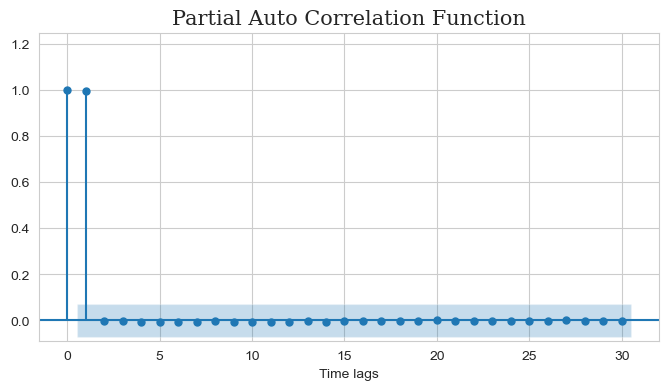

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(np.log(m2sl), auto_ylims = True, lags = 30, ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

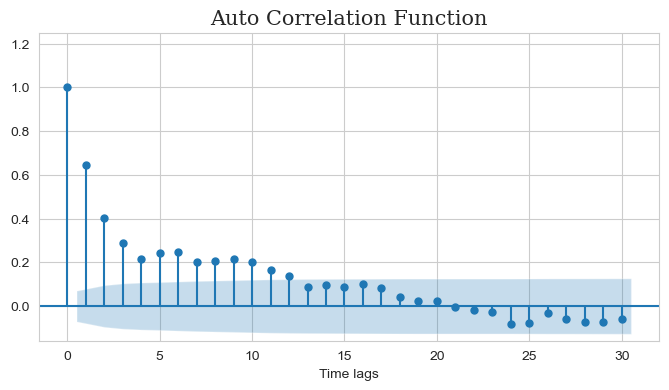

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf((np.log(m2sl) - np.log(m2sl.shift(1))).dropna(), auto_ylims = True, lags = 30, ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

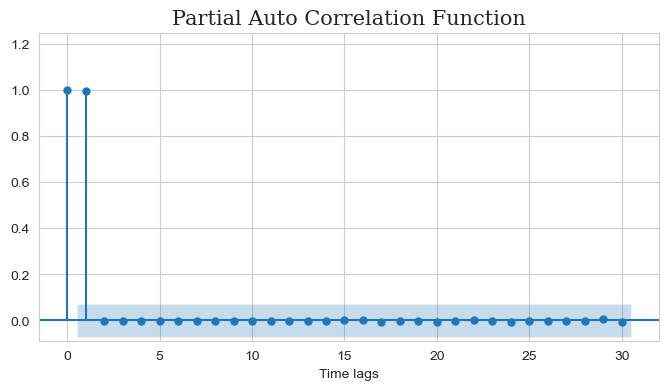

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(np.log(pce), auto_ylims = True, lags = 30, ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

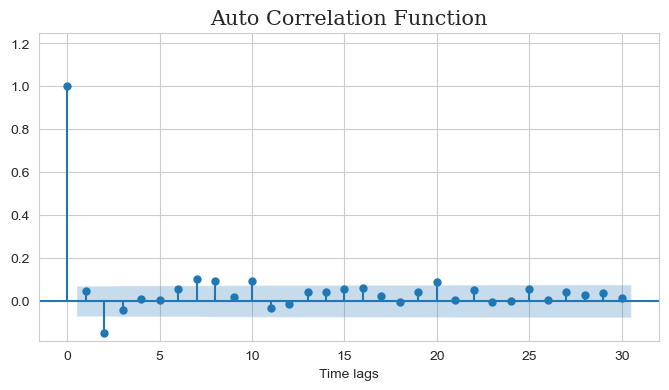

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf((np.log(pce) - np.log(pce.shift(1))).dropna(), auto_ylims = True, lags = 30, ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

차수를 확인한 결과, 본원통화량에 대해서는 $\mathrm{ARMA(1,12)}$가, 소비자 지출에 대해서는 $\mathrm{ARMA(1,2)}$가 적합하다고 판단하였다. 두 시계열의 공통된 차수인 $\mathrm{VARMA(1,2)}$가 적합한 모형이라고 판단하였다

`VARMAX()` 함수를 통해 VARMA 모형을 적합화할 수 있다

In [26]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

model = sm.tsa.VARMAX(fred, order = (1, 2))
results_varma = model.fit()
print(results_varma.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22262D+03    |proj g|=  4.18498D+03

At iterate    5    f=  7.94566D+02    |proj g|=  2.47714D+02

At iterate   10    f=  1.33485D+02    |proj g|=  6.00315D+01

At iterate   15    f=  5.12022D+01    |proj g|=  3.14632D+01

At iterate   20    f=  3.43412D+01    |proj g|=  3.45673D+00

At iterate   25    f=  2.52942D+01    |proj g|=  1.37574D+01

At iterate   30    f=  1.98279D+01    |proj g|=  2.78257D+00

At iterate   35    f=  1.86623D+01    |proj g|=  4.59344D+00

At iterate   40    f=  1.73399D+01    |proj g|=  1.53280D+01

At iterate   45    f=  1.68834D+01    |proj g|=  1.37830D+01

At iterate   50    f=  1.65776D+01    |proj g|=  1.80945D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

$\mathrm{VARMA}$ 모형 또한 마찬가지로 `fittedvalues` attribute를 통해 적합화된 값을 확인할 수 있다

In [27]:
results_varma.fittedvalues

,M2SL,PCE
DATE,,
1959-01-01,202593.517447,130800.389222
1959-02-01,7360.036981,8505.967680
1959-03-01,1884.706238,1825.180698
1959-04-01,2084.270136,2077.995255
1959-05-01,2162.883719,2171.511653
...,...,...
2023-02-01,14741.998391,10296.115857
2023-03-01,20723.235498,17925.121946
2023-04-01,18205.077096,15081.543306


<Axes: xlabel='DATE'>

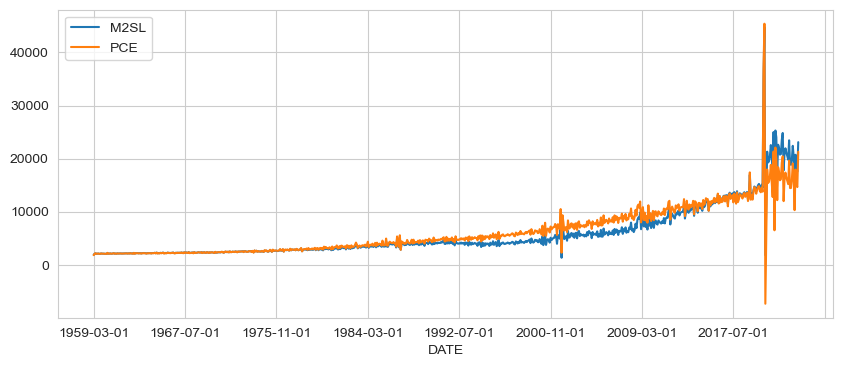

In [28]:
results_varma.fittedvalues[2:].plot(figsize = (10,4))

#### 2. Impulse Response Function

충격반응함수(impulse response function)는 시계열 분석에서 사용되는 중요한 개념으로, 시간에 따라 시계열 변수가 다른 시계열 변수의 충격(shock)에 어떻게 반응하는지를 설명한다. 충격반응함수는 $\mathrm{VAR}$ 모델 또는 $\mathrm{VARMA}$ 모델과 같은 다변량 시계열 모델에서 자주 사용된다

충격반응함수는 특정 시계열 변수가 다른 변수에 대해 일시적인 변화가 발생할 때 어떤 패턴으로 반응하는지를 볼 수 있다

$\mathrm{VAR}(p)$ 모형이 있다고 생각하자

$$\mathbf{r}_t = \mathbf{\mu} + \mathbf{a}_t + \mathbf{\Psi}_1\mathbf{a}_{t-1} + \mathbf{\Psi}_2 \mathbf{a}_{t-2} + \mathbf{\Psi}_3 \mathbf{a}_{t-3} + \cdots $$

$$\begin{matrix}
\mathbf{r}_t &=& \mathbf{\mu} + \mathbf{a}_t + \mathbf{\Psi}_1\mathbf{a}_{t-1} + \mathbf{\Psi}_2 \mathbf{a}_{t-2} + \mathbf{\Psi}_3 \mathbf{a}_{t-3} + \cdots \\
       &=& \mathbf{\mu} + \mathbf{LL}^{-1}\mathbf{a}_t + \mathbf{\Psi}_1\mathbf{LL}^{-1}\mathbf{a}_{t-1} + \mathbf{\Psi}_2 \mathbf{LL}^{-1}\mathbf{a}_{t-2} + \mathbf{\Psi}_3 \mathbf{LL}^{-1}\mathbf{a}_{t-3} + \cdots \\
       &=& \mathbf{\mu} + \mathbf{\Psi}_0^*\mathbf{a}_t + \mathbf{\Psi}_1^*\mathbf{a}_{t-1} + \mathbf{\Psi}_2^* \mathbf{a}_{t-2} + \mathbf{\Psi}_3^* \mathbf{a}_{t-3} + \cdots
\end{matrix}$$

여기서 coefficient matrix $\mathbf{\Psi}_i^*$는 *impulse response function*(충격반응함수)라고 한다

#### example 5

example 3에서 추정한 $\mathrm{VAR}$ 모형에 대해서 충격반응 함수를 추정하고 시각화하라

$\mathrm{VAR}$ result의 `irt()` method를 사용하면 attribute에 넣은 숫자만큼의 충격 반응을 확인할 수 있다. irf에 대해서 plotting을 하면 변수별로 변수에 대해 충격이 전해진 결과를 볼 수 있다

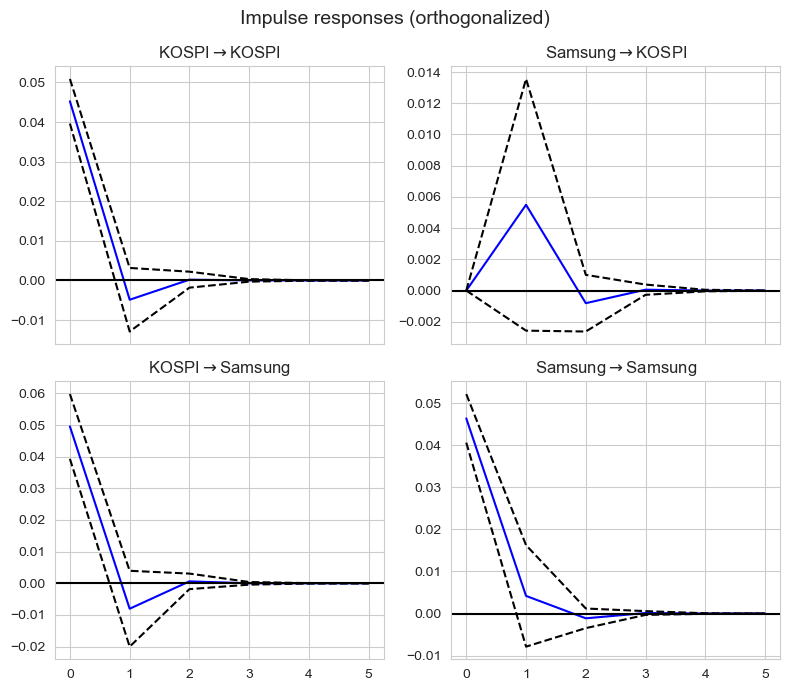

In [29]:
irf = results.irf(5)
irf.plot(orth = True, figsize = (8, 7))
plt.tight_layout()
plt.show()

impulse parameter에 변수를 써 넣으면 그 변수에 대한 충격만을 따로 볼 수 있다

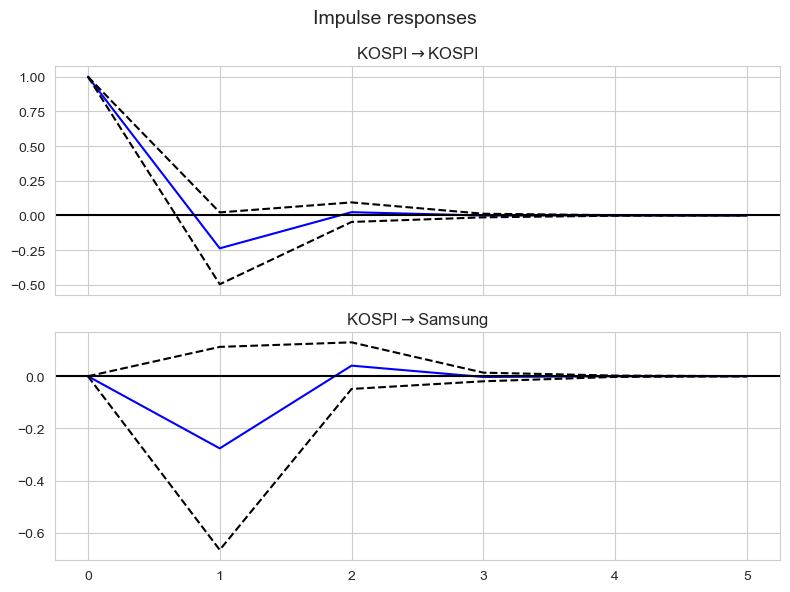

In [30]:
irf.plot(impulse = 'KOSPI', figsize = (8,6))
plt.tight_layout()
plt.show()

#### 3. Granger Causality

Granger Causality test는 한 시계열이 다른 시계열의 예측에 유용한지를 결정하기 위한 통계적 가설 검정 방법으로, 1969년 처음 제안되었다. 일반적으로 회귀분석은 단순한 상관관계를 반영하지만, Clive Granger는 경제학에서 원인관계를 검정하기 위해 다른 시계열의 이전 값들을 사용하여 시계열의 미래 값을 예측하는 능력을 측정할 수 있다고 주장하였다.
무언가가 다른 것보다 앞서는 것을 원인으로 가정하는 사후사건의 논리적 오류 때문에, 계량경제학자들은 Granger Causality test가 예측 원인관계만을 찾는다고 주장한다. 죽, X가 Y를 야기하는지를 검정하는 것이 아니라 X가 Y를 예측하는지를 테스트하는 것이다.

시계열 X가 Y를 Granger-Causaliry로 판명하는 경우, 일반적으로 X의 지연값에 대한 t-검정과 F-검정을 통해 (Y의 지연값도 포함하여) X 값이 Y의 미래 값을 통계적으로 유의한 정보를 제공하는지를 보여준다.
계산적으로 간단한 특징 때문에 시계열에서 원인관계 분석을 위한 방법으로 사용되고 있다


> 만약 시계열 변수 X의 과거 값과 변수 Y의 과거 값들을 기반으로 Y의 값을 예측하는 경우, 오직 Y의 과거 값들만을 사용하여 Y의 값을 예측하는 경우보다 변수 X가 변수 Y에 대한 예측을 더 잘할 때, 변수 X가 변수 Y를 Granger-Causality를 띈다고 한다

**3.1 Causality**

Granger는 인과관계를 다음 두 가지 원식을 기반으로 정의하였다

1. 원인은 결과보다 먼저 발생한다
2. 원인은 결과의 미래 값에 대한 특별한 정보를 가지고 있다

이러한 가정을 바탕으로 Granger는 $X$가 $Y$의 원인이 되는지 확인하기 위한 가설을 검정하는 것을 제안하였다

$$\mathbf{H_0} : \mathbb{P}[Y(t+1) \in A | \mathcal{I}(t)] = \mathbb{P}[Y(t+1) \in A | \mathcal{I}_{-X}(t)]$$
$$\mathbf{H_1} : \mathbb{P}[Y(t+1) \in A | \mathcal{I}(t)] \neq \mathbb{P}[Y(t+1) \in A | \mathcal{I}_{-X}(t)]$$

여기서 $\mathbb{P}$는 확률을 의미하고, $A$는 임의의 비어 있지 않은 집합, 그리고 $\mathcal{I}(t)$와 $\mathcal{I}_{-X}(t)$는 각각 전체 universe와 $X$가 제외된 universe에서 사용할 수 있는 정보를 나타낸다. 만약 위의 가설이 받아들여지면, 이를 보고 $X$가 $Y$는 Granger 인과성이 성립한다고 한다

#### example 6

`WTIUSD_price.csv`는 2020년 1월 1일부터 2023년 8월 21일까지의 미국 서부 텍사스 중질유(WTI)의 현물 가격을 기록한 데이터이다. WTI현물 가격과 KOSPI지수는 어떤 관계가 있는가? 두 시계열은 Granger Causality를 보이는가? Granger Causality Test를 위해 다음 가설을 검정하라

$$\mathrm{H}_0 : \mathrm{WTI/USD ~does ~not ~Granger-cause ~KOSPI}$$

만약 Granger Causality를 보이지 않는다면 그 이유는 무엇인가?

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
wti = pd.read_csv('WTIUSD_price.csv', index_col = 0)
wti.index = pd.to_datetime(wti.index)
wti = wti.sort_index()
wti.columns = ['Close','Open','High','Low','Volume','Variance']
wti.index.name = ''
wti

,Close,Open,High,Low,Volume,Variance
,,,,,,
2020-01-02,61.19,61.42,61.48,60.73,NaN,-0.05%
2020-01-03,63.10,61.20,64.11,61.16,NaN,3.12%
2020-01-05,63.89,63.84,64.30,63.64,NaN,1.25%
2020-01-06,62.99,63.86,64.75,62.69,NaN,-1.41%
2020-01-07,64.92,62.98,65.48,62.16,NaN,3.06%
...,...,...,...,...,...,...
2023-08-16,79.25,81.11,81.47,79.19,NaN,-2.26%
2023-08-17,80.06,79.25,81.08,79.08,NaN,1.02%
2023-08-18,81.19,80.05,81.43,79.50,NaN,1.41%


불러오는 자료를 편집이 쉽게 바꾸어 준다

In [33]:
wti_price = wti.Close.astype(float)
wti_ret = (np.log(wti_price) - np.log(wti_price.shift(1))).dropna()
wti_ret


2020-01-03    0.030737
2020-01-05    0.012442
2020-01-06   -0.014187
2020-01-07    0.030180
2020-01-08   -0.079311
                ...   
2023-08-16   -0.022829
2023-08-17    0.010169
2023-08-18    0.014016
2023-08-20   -0.001973
2023-08-21    0.007132
Name: Close, Length: 1126, dtype: float64

분석을 위해 WTI price를 차분 시계열 데이터로 변환해 준다

In [34]:
import pandas_datareader as pdr
import datetime

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 8, 21)

kospi = pdr.DataReader("KOSPI", "naver", start_date, end_date).astype(float)
kospi

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,2201.21,2202.32,2171.84,2175.17,494677.0
2020-01-03,2192.58,2203.38,2165.39,2176.46,631562.0
2020-01-06,2154.97,2164.42,2149.95,2155.07,592670.0
2020-01-07,2166.60,2181.62,2164.27,2175.54,568235.0
2020-01-08,2156.27,2162.32,2137.72,2151.31,913830.0
...,...,...,...,...,...
2023-08-14,2586.51,2592.91,2561.88,2570.87,624378.0
2023-08-16,2550.13,2550.53,2520.87,2525.64,685136.0
2023-08-17,2512.92,2520.56,2482.06,2519.85,735133.0


KOSPI와의 관계를 보아야 하므로 pandas datareader를 이용해 KOSPI 지수 정보를 불러온다

In [35]:
kospi_ret = np.log(kospi.Close / kospi.Close.shift(1)).dropna()
kospi_ret

Date
2020-01-03    0.000593
2020-01-06   -0.009876
2020-01-07    0.009454
2020-01-08   -0.011200
2020-01-09    0.016202
                ...   
2023-08-14   -0.007900
2023-08-16   -0.017750
2023-08-17   -0.002295
2023-08-18   -0.006110
2023-08-21    0.001715
Name: Close, Length: 899, dtype: float64

마찬가지로, 분석을 위해 차분 시계열로 변환해 준다

In [36]:
matrix = pd.concat([wti_ret, kospi_ret], axis = 1).dropna()
matrix.columns = ['WTI/USD','KOSPI']
matrix

,WTI/USD,KOSPI
2020-01-03,0.030737,0.000593
2020-01-06,-0.014187,-0.009876
2020-01-07,0.030180,0.009454
2020-01-08,-0.079311,-0.011200
2020-01-09,-0.007028,0.016202
...,...,...
2023-08-14,-0.006412,-0.007900
2023-08-16,-0.022829,-0.017750
2023-08-17,0.010169,-0.002295
2023-08-18,0.014016,-0.006110


추정을 위해 Matrix를 생성한다

In [37]:
from statsmodels.tsa.api import VAR

model = VAR(matrix)
results = model.fit(2, trend = 'c')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, Sep, 2023
Time:                     00:29:57
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.3846
Nobs:                     892.000    HQIC:                  -15.4178
Log likelihood:           4364.12    FPE:                1.97338e-07
AIC:                     -15.4383    Det(Omega_mle):     1.95144e-07
--------------------------------------------------------------------
Results for equation WTI/USD
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000495         0.001185            0.418           0.676
L1.WTI/USD         0.162166         0.033540            4.835           0.000
L1.KOSPI           0.065978         0.094160            0.701         

VAR(2)모형을 이용해 추정을 해 준다

In [38]:
# Granger-causality test
gctest = results.test_causality('KOSPI', 'WTI/USD', kind = 'wald')
print(gctest.summary())

Granger causality Wald-test. H_0: WTI/USD does not Granger-cause KOSPI. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         60.28          5.991   0.000  2
----------------------------------------


result에 대해 granger causality를 추정한 결과 미국 서부 텍사스 중질유 현물가격은 KOSPI index에 대해 Granger 인과관계를 보이는 것으로 나타났다

여기서 주의할 점은, 인과성이 보장된다는 것이 아닌 KOSPI의 가격 움직임을 예측하는데 WTI/USD의 변동을 이용해 예측하는 것이 설득력이 있다는 것이다

#### Exercise 4

KOSPI 혹은 NASDAQ, NIKKEI 상장 회사 중 하나를 선정하여 미국 서부 텍사스 중질유 현물가격(WTI/USD)를 포함하는 VAR모형을 추정하라. 그리고 아래의 가설을 검증하라

$$\mathrm{H}_0 : \mathrm{WTI/USD ~does ~not ~Granger-cause ~} \mathbf{Asset_i}$$

Granger 인과관계가 보이는가? 만약 보이지 않는다면 무슨 이유에서인가?